In [6]:
import json
import os
from os import listdir
from os.path import isfile, join, isdir
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

import tabulate
import numpy as np
import math

from itertools import cycle, islice


from collect_data import collect_statistics

In [3]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 16, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'legend.fontsize': 16, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    #'text.usetex': True,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
    'lines.linewidth': 2
}

matplotlib.rcParams.update(params)

In [8]:
out_dir = join('..', 'plots', 'parallelization_exp')
event_dir = join('..', 'data', 'spark_logs-parallelization_exp')
memory_dir = join(event_dir, 'spark-memory')

In [9]:
appname = 'LUBM'
data_size_dir = 'LUBM'
collections = ['schemex', 'attribute', 'type']
suffix = ''
hide_legend = False

appname = 'BSBM'
data_size_dir = 'BSBM'
collections = ['attribute']#, 'type', 'schemex'] #, 
parallizations = ['parallel_1', 'parallel_2', 'parallel_4', 'parallel_8', 'parallel_16']
#parallizations = ['parallel_16', 'parallel_8', 'parallel_4', 'parallel_2', 'parallel_1']

suffix = '-test-1'
hide_legend = False
# BSBM_attribute-parallel_1-test-1-performance.csv'

# BSBM-attribute-parallel_1-test-1-performance.csv


#appname = 'dyldo_y2019_full'
#data_size_dir = 'DyLDO-ext'
#collections =['schemex', 'attribute', 'type']
#suffix = ''
#hide_legend = True

appname = 'DyLDO-core'
data_size_dir = 'DyLDO-core'
collections =['attribute']
parallizations = ['parallel_1', 'parallel_2', 'parallel_4', 'parallel_8', 'parallel_16']
suffix = '-test-2'
hide_legend = False



ticks = 5.0
interpolate = True

In [10]:
iterations = 0

performance_frame = pd.DataFrame() 
run_details_frame = pd.DataFrame()
for collection in collections:
#    new_zero_incr = 0
#    new_zero_batch = 0
    for parallelization in parallizations:
        # def collectStatistics(analyze_app, event_dir='/tmp/spark-events', memory_dir='/tmp/spark-memory'):   

        df = collect_statistics(appname+'-'+collection+'-'+parallelization+suffix, 
                               event_dir=event_dir, 
                               memory_dir=memory_dir) 
        
        performance_frame[collection+'-'+parallelization+'-Inc'] = df['Incremental Duration']
        performance_frame[collection+'-'+parallelization+'-Batch'] = df['Batch Duration']
        
        run_details_frame[collection+'-'+parallelization+'-Inc'] = df['Incremental Duration']
        run_details_frame[collection+'-'+parallelization+'-Batch'] = df['Batch Duration']
        run_details_frame[collection+'-'+parallelization+'-Inc F&M'] = df['Incremental F&M Duration']
        run_details_frame[collection+'-'+parallelization+'-Batch F&M'] = df['Batch F&M Duration']        
    
    

#performance_frame.columns = ['SchemEX:Incr', 'SchemEX:Batch', 
#             'AttrColl:Incr', 'AttrColl:Batch',
#             'TypeColl:Incr', 'TypeColl:Batch']
 
convert = lambda x: x / 1000 / 60
performance_frame = performance_frame.applymap(convert)  
run_details_frame = run_details_frame.applymap(convert)

display(performance_frame.head())
display(run_details_frame.head())

if (appname == 'dyldo_y2019_core' or appname == 'DyLDO-core') and len(performance_frame) > 23:
    performance_frame = performance_frame.drop(performance_frame.index[[21,22]])
    run_details_frame = run_details_frame.drop(run_details_frame.index[[21,22]])
    
if appname == 'dyldo_y2019_full':
    performance_frame = performance_frame.head()
    run_details_frame = run_details_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
 

,attribute-parallel_1-Inc,attribute-parallel_1-Batch,attribute-parallel_2-Inc,attribute-parallel_2-Batch,attribute-parallel_4-Inc,attribute-parallel_4-Batch,attribute-parallel_8-Inc,attribute-parallel_8-Batch,attribute-parallel_16-Inc,attribute-parallel_16-Batch
Iteration,,,,,,,,,,
0,92.857167,283.901700,95.112483,283.088183,39.834633,106.987850,37.096467,54.417700,43.252483,46.691500
1,25.812483,305.867783,17.379867,292.061767,12.174217,107.851033,12.276383,55.475617,12.194617,43.912917
2,31.759583,275.939233,22.008100,296.629633,15.491433,112.289467,15.663150,58.446567,15.232383,47.556050
3,30.771333,271.406067,20.651500,279.241017,14.719383,109.025450,16.397883,55.528250,14.518000,47.938517
4,27.845867,277.382283,18.527233,239.947183,13.056583,106.222317,13.591733,53.378167,12.988733,43.012300


,attribute-parallel_1-Inc,attribute-parallel_1-Batch,attribute-parallel_1-Inc F&M,attribute-parallel_1-Batch F&M,attribute-parallel_2-Inc,attribute-parallel_2-Batch,attribute-parallel_2-Inc F&M,attribute-parallel_2-Batch F&M,attribute-parallel_4-Inc,attribute-parallel_4-Batch,attribute-parallel_4-Inc F&M,attribute-parallel_4-Batch F&M,attribute-parallel_8-Inc,attribute-parallel_8-Batch,attribute-parallel_8-Inc F&M,attribute-parallel_8-Batch F&M,attribute-parallel_16-Inc,attribute-parallel_16-Batch,attribute-parallel_16-Inc F&M,attribute-parallel_16-Batch F&M
Iteration,,,,,,,,,,,,,,,,,,,,
0,92.857167,283.901700,69.597667,260.103333,95.112483,283.088183,79.320550,266.743000,39.834633,106.987850,31.147267,97.753300,37.096467,54.417700,28.700983,45.030550,43.252483,46.691500,34.776600,38.029017
1,25.812483,305.867783,2.958717,282.671833,17.379867,292.061767,3.319133,277.901133,12.174217,107.851033,3.428767,99.117733,12.276383,55.475617,3.405000,46.179250,12.194617,43.912917,4.007367,35.748817
2,31.759583,275.939233,4.654867,248.296017,22.008100,296.629633,5.182967,278.070567,15.491433,112.289467,4.809100,101.506867,15.663150,58.446567,4.763950,47.100333,15.232383,47.556050,5.450700,37.784867
3,30.771333,271.406067,3.472917,244.266283,20.651500,279.241017,4.353433,262.364583,14.719383,109.025450,4.246133,98.457850,16.397883,55.528250,4.147183,44.959833,14.518000,47.938517,4.946300,38.174350
4,27.845867,277.382283,3.457350,253.676700,18.527233,239.947183,4.116433,225.516167,13.056583,106.222317,3.968483,97.044733,13.591733,53.378167,3.809600,43.738450,12.988733,43.012300,4.565700,34.464167


18.50746666666667
34


[(0, 'indianred'), (34, 'forestgreen'), (40, 'darkslateblue')]

(0, 34, 40)

('indianred', 'forestgreen', 'darkslateblue')

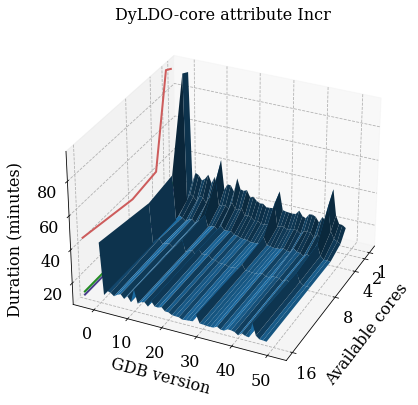

157.42671666666666
41


[(18, 'indianred'), (36, 'darkslateblue'), (41, 'forestgreen')]

(18, 36, 41)

('indianred', 'darkslateblue', 'forestgreen')

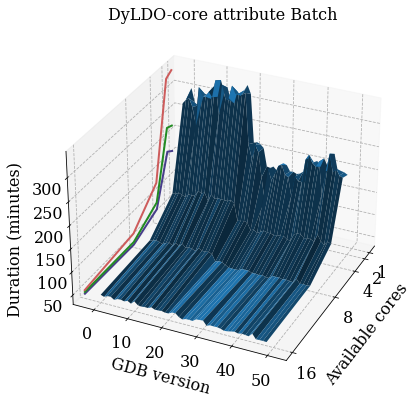

In [12]:
#box = dict(facecolor='white', pad=5, alpha=0.2)


def my_3d_plot(x, y, values, plot_name, z_lim=None, save_dir=None):
    y_offset = 5
    
    # prepare data   
    X, Y = np.meshgrid(x, y)
    Z = np.transpose(np.array(values))
    
    
    fig = plt.figure()
    ax = Axes3D(fig)
      
    # plot the data
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
    
    # add contour lines for readability
    print(np.min(values[0]))
    min_index = np.argmin(values[0])
    max_index = np.argmax(values[0])
    
    median_index = list(values[0]).index(np.percentile(values[0], 50, interpolation='nearest'))

    print(median_index)
    lvls = [min_index, median_index, max_index]
    colors = ['darkslateblue', 'forestgreen', 'indianred']
    temp = list(zip(lvls, colors))
    temp.sort(key=lambda x: x[0])
    display(temp)
    lvls, colors = zip(*temp)
    display(lvls)
    display(colors)
    
    # TODO: 40 is not displayed properly
    #lvls = [20,30,39]
    cset = ax.contour(X, Y, Z, zdir='y', levels=lvls, offset=-y_offset, colors=colors)

    ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(plot_name)
    plt.xticks(x)
    ax.view_init(30, 25)
    
    if z_lim:
        ax.set_zlim([0, z_lim])

    ax.set_ylim([-y_offset, len(y)+y_offset])
    
    ax.set_xlabel("Available cores", labelpad=10)
    ax.set_ylabel("GDB version", labelpad=10)

    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel("Duration (minutes)", rotation=90, labelpad=10)
    
    #fig.colorbar.remove()
    
    if save_dir:
        plt.savefig(save_dir + '/' + plot_name.replace(' ', '-') + '-parallel.pdf',  bbox_inches='tight')
        plt.savefig(save_dir + '/' + plot_name.replace(' ', '-') + '-parallel.png',  bbox_inches='tight')
        
    plt.show()


for collection in collections:
    values_incr = []
    values_batch = []
    for parallelization in parallizations:
        values_incr.append(np.array(performance_frame[collection+'-'+parallelization+'-Inc']))
        values_batch.append(np.array(performance_frame[collection+'-'+parallelization+'-Batch']))
        
    ## TODO parameterize
    x = [1,2,4,8,16]
    y = np.arange(0, len(performance_frame), 1) # 41

    z_lim = performance_frame.max().max()
    z_lim += z_lim/10
    z_lim = 5 * round(z_lim/5)

    my_3d_plot(x, y, values_incr, '%s %s Incr' % (appname, collection), save_dir=out_dir)
    
    my_3d_plot(x, y, values_batch, '%s %s Batch' % (appname, collection), save_dir=out_dir)


#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.001)


In [13]:
def deduplicate(input_list):
    seen = set()
    new_list = []
    for item in input_list:
        if item not in seen:
            new_list.append(item)
            seen.add(item)
    return new_list


In [14]:
# some speed-up analysis
#display(performance_frame)
speed_up_frame = pd.DataFrame(columns=deduplicate([x.replace('-Inc', '').replace('-Batch', '') for x in performance_frame.columns]))

for collection in collections:
    for parallelization in parallizations:
        speed_up_frame[collection+'-'+parallelization] = performance_frame[collection+'-'+parallelization+'-Batch'] /performance_frame[collection+'-'+parallelization+'-Inc']
        print('batch runs faster than incremental for %s: %s' % (collection+'-'+parallelization, (speed_up_frame[collection+'-'+parallelization] < 1.0).sum()))

display(speed_up_frame.mean())
display(speed_up_frame.std())    
display(speed_up_frame.mean().min())
display(speed_up_frame.mean().max())  

batch runs faster than incremental for attribute-parallel_1: 0
batch runs faster than incremental for attribute-parallel_2: 0
batch runs faster than incremental for attribute-parallel_4: 0
batch runs faster than incremental for attribute-parallel_8: 0
batch runs faster than incremental for attribute-parallel_16: 0


attribute-parallel_1      9.351151
attribute-parallel_2     13.479793
attribute-parallel_4      7.622119
attribute-parallel_8      4.014830
attribute-parallel_16     3.709551
dtype: float64

attribute-parallel_1     1.811439
attribute-parallel_2     3.212168
attribute-parallel_4     1.325574
attribute-parallel_8     0.556996
attribute-parallel_16    0.662938
dtype: float64

3.7095506059801773

13.479793450223049

In [15]:
t1 = (performance_frame['attribute-parallel_1-Batch'] /performance_frame['attribute-parallel_1-Inc']).mean()
t2 = (performance_frame['attribute-parallel_1-Batch'].sum() /performance_frame['attribute-parallel_1-Inc'].sum())

In [16]:
display(t1)
display(t2)

9.351150967051234

8.98076540969257

In [17]:
for collection in collections:
    for parallelization in parallizations:
        macro_avg = (performance_frame['%s-%s-Batch' % (collection, parallelization)] / performance_frame['%s-%s-Inc'  % (collection, parallelization)]).mean()
        micro_avg = (performance_frame['%s-%s-Batch' % (collection, parallelization)].sum() / performance_frame['%s-%s-Inc'  % (collection, parallelization)].sum())
        print('%s - Micro Avg: %s' % (parallelization, micro_avg.round(2)))
        print('%s - Macro Avg: %s' % (parallelization, macro_avg.round(2)))

parallel_1 - Micro Avg: 8.98
parallel_1 - Macro Avg: 9.35
parallel_2 - Micro Avg: 12.44
parallel_2 - Macro Avg: 13.48
parallel_4 - Micro Avg: 7.38
parallel_4 - Macro Avg: 7.62
parallel_8 - Micro Avg: 3.89
parallel_8 - Macro Avg: 4.01
parallel_16 - Micro Avg: 3.48
parallel_16 - Macro Avg: 3.71


In [19]:
# print((all_frame['batch'] / all_frame['incr']).mean())
# print(all_frame['batch'].sum() / all_frame['incr'].sum())

In [20]:
for col in performance_frame.columns:
    if 'parallel_1-Inc' in col:
        #baseline
        baseline = performance_frame[col]
    elif '-Batch' in col:
        print('%s has faster runs than baseline? %s' % (col, (performance_frame[col] - baseline < 0).sum()))
        

attribute-parallel_1-Batch has faster runs than baseline? 0
attribute-parallel_2-Batch has faster runs than baseline? 0
attribute-parallel_4-Batch has faster runs than baseline? 0
attribute-parallel_8-Batch has faster runs than baseline? 1
attribute-parallel_16-Batch has faster runs than baseline? 1


In [21]:
parallelization_frame = pd.DataFrame()
for collection in collections:
    for i in range(1, len(parallizations)):
        prev = parallizations[i-1]
        current = parallizations[i]
        parallelization_frame[collection+'-'+current+'-Batch'] = performance_frame[collection+'-'+prev+'-Batch'] / performance_frame[collection+'-'+current+'-Batch'] 
        parallelization_frame[collection+'-'+current+'-Inc'] = performance_frame[collection+'-'+prev+'-Inc'] / performance_frame[collection+'-'+current+'-Inc'] 
            
display(parallelization_frame.mean())
display(parallelization_frame.std())

attribute-parallel_2-Batch     1.004828
attribute-parallel_2-Inc       1.421828
attribute-parallel_4-Batch     2.601937
attribute-parallel_4-Inc       1.501395
attribute-parallel_8-Batch     1.903802
attribute-parallel_8-Inc       1.007920
attribute-parallel_16-Batch    1.092540
attribute-parallel_16-Inc      0.990002
dtype: float64

attribute-parallel_2-Batch     0.115668
attribute-parallel_2-Inc       0.103813
attribute-parallel_4-Batch     0.256525
attribute-parallel_4-Inc       0.172909
attribute-parallel_8-Batch     0.107215
attribute-parallel_8-Inc       0.042330
attribute-parallel_16-Batch    0.170493
attribute-parallel_16-Inc      0.039810
dtype: float64

In [22]:
# overall gain:
skip_rows = 1

t_frame = performance_frame[collection+'-parallel_1-Batch'] / performance_frame[collection+'-parallel_16-Batch']
print('Speed-up batch 1 to 16 between %.4f and %.4f (mean: %.4f +- %.4f)' % (t_frame.min(), t_frame.max(), t_frame.mean(), t_frame.std()))


t_frame = performance_frame.iloc[skip_rows:][collection+'-parallel_1-Inc'] / performance_frame.iloc[skip_rows:][collection+'-parallel_16-Inc']
print('Speed-up incr. 1 to 16 between %.4f and %.4f (mean: %.4f +- %.4f)' % (t_frame.min(), t_frame.max(), t_frame.mean(), t_frame.std()))


Speed-up batch 1 to 16 between 3.7749 and 7.4025 (mean: 5.4239 +- 1.1460)
Speed-up incr. 1 to 16 between 2.0087 and 2.2408 (mean: 2.1087 +- 0.0454)


In [23]:
# one core incr. vs 16 core batch

t_frame = performance_frame.iloc[skip_rows:][collection+'-parallel_16-Batch'] / performance_frame.iloc[skip_rows:][collection+'-parallel_1-Inc']
print('Speed-up incr. 1 to batch 16 between %.4f and %.4f (mean: %.4f +- %.4f)' % (t_frame.min(), t_frame.max(), t_frame.mean(), t_frame.std()))



Speed-up incr. 1 to batch 16 between 1.1549 and 2.3571 (mean: 1.7871 +- 0.2676)


In [24]:
display(performance_frame.iloc[skip_rows:].mean())
display(performance_frame.iloc[skip_rows:].std())
display(performance_frame.iloc[skip_rows:].min())
display(performance_frame.iloc[skip_rows:].max())

attribute-parallel_1-Inc        25.034720
attribute-parallel_1-Batch     236.289836
attribute-parallel_2-Inc        17.663532
attribute-parallel_2-Batch     238.580033
attribute-parallel_4-Inc        11.834798
attribute-parallel_4-Batch      91.185660
attribute-parallel_8-Inc        11.764677
attribute-parallel_8-Batch      47.586828
attribute-parallel_16-Inc       11.856603
attribute-parallel_16-Batch     43.425791
dtype: float64

attribute-parallel_1-Inc        5.602179
attribute-parallel_1-Batch     60.318306
attribute-parallel_2-Inc        4.815577
attribute-parallel_2-Batch     67.011088
attribute-parallel_4-Inc        2.537381
attribute-parallel_4-Batch     22.230847
attribute-parallel_8-Inc        2.492596
attribute-parallel_8-Batch      9.716144
attribute-parallel_16-Inc       2.537572
attribute-parallel_16-Batch     3.626592
dtype: float64

attribute-parallel_1-Inc        18.507467
attribute-parallel_1-Batch     157.426717
attribute-parallel_2-Inc        12.587800
attribute-parallel_2-Batch     108.926283
attribute-parallel_4-Inc         8.780233
attribute-parallel_4-Batch      62.706933
attribute-parallel_8-Inc         8.787433
attribute-parallel_8-Batch      35.777183
attribute-parallel_16-Inc        8.809167
attribute-parallel_16-Batch     37.368867
dtype: float64

attribute-parallel_1-Inc        43.385167
attribute-parallel_1-Batch     337.940333
attribute-parallel_2-Inc        34.325000
attribute-parallel_2-Batch     347.388217
attribute-parallel_4-Inc        19.916200
attribute-parallel_4-Batch     126.312883
attribute-parallel_8-Inc        19.368483
attribute-parallel_8-Batch      65.100417
attribute-parallel_16-Inc       20.218383
attribute-parallel_16-Batch     51.199283
dtype: float64

In [25]:
mux = pd.MultiIndex.from_product([['1','2','4', '8', '16'], ['incr.','batch']])
df = pd.DataFrame(columns=mux)
df

Empty DataFrame
Columns: [(1, incr.), (1, batch), (2, incr.), (2, batch), (4, incr.), (4, batch), (8, incr.), (8, batch), (16, incr.), (16, batch)]
Index: []

In [26]:
latex_frame = performance_frame.copy()
latex_frame.columns = ['1 core incr.', '1 core batch',
                       '2 core incr.', '2 core batch',
                       '4 core incr.', '4 core batch',
                       '8 core incr.', '8 core batch',
                       '16 core incr.', '16 core batch']
latex_frame.columns = mux
latex_frame.index.rename('GDB Version', True)
latex_frame = latex_frame.round(2)
display(latex_frame.mean())

1   incr.     26.418571
    batch    237.261429
2   incr.     19.244694
    batch    239.488980
4   incr.     12.406327
    batch     91.508571
8   incr.     12.282041
    batch     47.726531
16  incr.     12.497551
    batch     43.492653
dtype: float64

In [27]:
print(latex_frame.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{1} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{4} & \multicolumn{2}{l}{8} & \multicolumn{2}{l}{16} \\
{} &  incr. &   batch &  incr. &   batch &  incr. &   batch &  incr. &  batch &  incr. &  batch \\
GDB Version &        &         &        &         &        &         &        &        &        &        \\
\midrule
0           &  92.86 &  283.90 &  95.11 &  283.09 &  39.83 &  106.99 &  37.10 &  54.42 &  43.25 &  46.69 \\
1           &  25.81 &  305.87 &  17.38 &  292.06 &  12.17 &  107.85 &  12.28 &  55.48 &  12.19 &  43.91 \\
2           &  31.76 &  275.94 &  22.01 &  296.63 &  15.49 &  112.29 &  15.66 &  58.45 &  15.23 &  47.56 \\
3           &  30.77 &  271.41 &  20.65 &  279.24 &  14.72 &  109.03 &  16.40 &  55.53 &  14.52 &  47.94 \\
4           &  27.85 &  277.38 &  18.53 &  239.95 &  13.06 &  106.22 &  13.59 &  53.38 &  12.99 &  43.01 \\
5           &  29.48 &  299.97 &  22.17 &  325.51 &  14.49 &  113.76 &  14.56 &

# run details


In [28]:
display(run_details_frame.head())

,attribute-parallel_1-Inc,attribute-parallel_1-Batch,attribute-parallel_1-Inc F&M,attribute-parallel_1-Batch F&M,attribute-parallel_2-Inc,attribute-parallel_2-Batch,attribute-parallel_2-Inc F&M,attribute-parallel_2-Batch F&M,attribute-parallel_4-Inc,attribute-parallel_4-Batch,attribute-parallel_4-Inc F&M,attribute-parallel_4-Batch F&M,attribute-parallel_8-Inc,attribute-parallel_8-Batch,attribute-parallel_8-Inc F&M,attribute-parallel_8-Batch F&M,attribute-parallel_16-Inc,attribute-parallel_16-Batch,attribute-parallel_16-Inc F&M,attribute-parallel_16-Batch F&M
Iteration,,,,,,,,,,,,,,,,,,,,
0,92.857167,283.901700,69.597667,260.103333,95.112483,283.088183,79.320550,266.743000,39.834633,106.987850,31.147267,97.753300,37.096467,54.417700,28.700983,45.030550,43.252483,46.691500,34.776600,38.029017
1,25.812483,305.867783,2.958717,282.671833,17.379867,292.061767,3.319133,277.901133,12.174217,107.851033,3.428767,99.117733,12.276383,55.475617,3.405000,46.179250,12.194617,43.912917,4.007367,35.748817
2,31.759583,275.939233,4.654867,248.296017,22.008100,296.629633,5.182967,278.070567,15.491433,112.289467,4.809100,101.506867,15.663150,58.446567,4.763950,47.100333,15.232383,47.556050,5.450700,37.784867
3,30.771333,271.406067,3.472917,244.266283,20.651500,279.241017,4.353433,262.364583,14.719383,109.025450,4.246133,98.457850,16.397883,55.528250,4.147183,44.959833,14.518000,47.938517,4.946300,38.174350
4,27.845867,277.382283,3.457350,253.676700,18.527233,239.947183,4.116433,225.516167,13.056583,106.222317,3.968483,97.044733,13.591733,53.378167,3.809600,43.738450,12.988733,43.012300,4.565700,34.464167


In [29]:
find_and_merge_frame = pd.DataFrame()
for collection in collections:
    for i in range(0, len(parallizations)):
        current = parallizations[i]
        find_and_merge_frame[collection+'-'+current+'-Batch'] = run_details_frame[collection+'-'+current +'-Batch F&M'] / run_details_frame[collection+'-'+current+'-Batch'] 
        find_and_merge_frame[collection+'-'+current+'-Inc'] = run_details_frame[collection+'-'+current+'-Inc F&M'] / run_details_frame[collection+'-'+current+'-Inc'] 
            
display(find_and_merge_frame.mean())
display(find_and_merge_frame.std())

attribute-parallel_1-Batch     0.909583
attribute-parallel_1-Inc       0.167052
attribute-parallel_2-Batch     0.943794
attribute-parallel_2-Inc       0.260654
attribute-parallel_4-Batch     0.910360
attribute-parallel_4-Inc       0.326474
attribute-parallel_8-Batch     0.827826
attribute-parallel_8-Inc       0.314405
attribute-parallel_16-Batch    0.828406
attribute-parallel_16-Inc      0.377422
dtype: float64

attribute-parallel_1-Batch     0.011183
attribute-parallel_1-Inc       0.115721
attribute-parallel_2-Batch     0.011034
attribute-parallel_2-Inc       0.128815
attribute-parallel_4-Batch     0.009719
attribute-parallel_4-Inc       0.087064
attribute-parallel_8-Batch     0.013499
attribute-parallel_8-Inc       0.081093
attribute-parallel_16-Batch    0.021914
attribute-parallel_16-Inc      0.082160
dtype: float64

# other stuff

In [111]:
import numpy as np
import matplotlib.pyplot as plt




In [161]:
size_frame = pd.DataFrame()
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
        
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')

        if '|V|' not in size_frame:
            size_frame['|V|'] = df['Imprint links']
            
        size_frame[collection+':|V_vs|'] = df['Schema Elements (SE)']
        size_frame[collection+':|E_vs|'] = df['Schema Relations (SR)']


        
size_frame = size_frame.join(edgeframe,how='left')
display(size_frame.head())


,|V|,schemex:|V_vs|,schemex:|E_vs|,attribute:|V_vs|,attribute:|E_vs|,type:|V_vs|,type:|E_vs|,0
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


In [162]:
display(size_frame['|V|'].min())
display(size_frame['|V|'].max())
display(size_frame['|V|'].mean())
display(size_frame['|V|'].std())

6382958

10718848

9097698.909090908

1663543.6874221521

drop the beat


,|V|,SchemEX:|V_vs|,SchemEX:|E_vs|,AttrColl:|V_vs|,AttrColl:|E_vs|,TypeColl:|V_vs|,TypeColl:|E_vs|,|E|
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


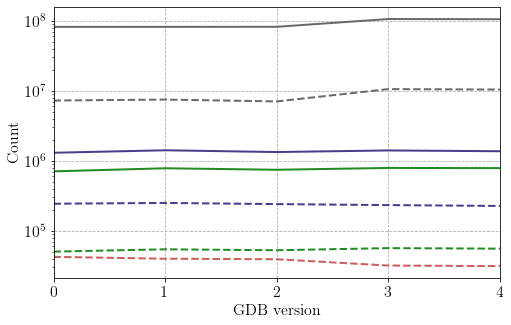

In [163]:
size_frame.columns = ['|V|', 'SchemEX:|V_vs|','SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|E|']

if appname == 'dyldo_y2019_core':
    if interpolate:
        size_frame = size_frame.drop(size_frame.index[[21,22]])
    else:
        size_frame.loc[21:22,'|V|':'|E|']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
   

if appname == 'dyldo_y2019_full':
    size_frame = size_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
  
display(size_frame)

sorted_frame = size_frame[['SchemEX:|V_vs|', 'SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|V|', '|E|']]

sorted_frame.columns=['SchemEX:$|V_{vs}|$', 'SchemEX:$|E_{vs}|$' 
                    , 'AttrColl:$|V_{vs}|$', 'AttrColl:$|E_{vs}|$'
                    , 'TypeColl:$|V_{vs}|$', 'TypeColl:$|E_{vs}|$', '$|V|$', '$|E|$']

ax = sorted_frame.plot(logy=True, style = ['--','-','--','-','--','-','--','-'], 
                       color=['darkslateblue', 'darkslateblue',
                             'forestgreen','forestgreen',
                             'indianred','indianred', 'dimgray', 'dimgray'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])color=['dimgray', 'darkslateblue']
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, ticks))
ax.set_xlabel("GDB version")
ax.set_ylabel("Count")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)
if hide_legend:
    ax.get_legend().remove()
    
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.pdf',  bbox_inches = 'tight')

Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')


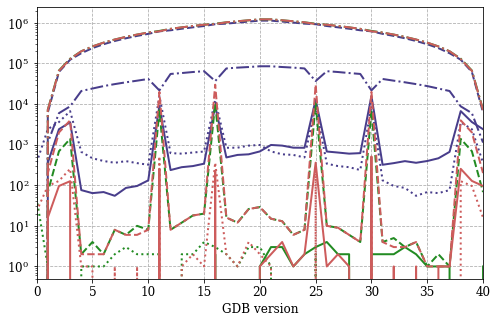

In [9]:
frames = [None, None, None]
i = 0
iterations = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        #del df['NewlyObservedSchema (SE_new)']
        #del df['DeletedSchemaStructures (SE_del)']

        
        del df['TotalNumberOfNewInstances'] 
        del df['InstanceAddedWithKnownSchema (PE_add)']
        del df['InstancesDeleted (PE_del)']
        del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
        del df['PayloadEntriesAdded'] 
        del df['PayloadEntriesRemoved'] 
        del df['InstanceToSchemaLinksAdded'] 
        del df['InstanceToSchemaLinksRemoved'] 

        del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
        
        del df['TotalNumberOfSchemaElementsWritten']
        del df['TotalNumberOfSchemaElementsDeleted']
        #del df['InstanceNotChanged (PE_mod)']
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        print(df.columns)
        df.columns = [collection+'ADD', collection+'DEL', collection+'MOD', collection+'unchanged']    #'Modified pe(v)'
        
        #df.columns = [collection+'MOD-ELEM', collection+'Unchanged v', collection+'ADD-ELEM', collection+'DEL-ELEM']    #'Modified pe(v)'
        #df = df[[collection+'ADD-ELEM', collection+'DEL-ELEM', collection+'MOD-ELEM',collection+'Unchanged v']] #'Modified pe(v)'
        frames[i] = df
        i = i + 1
        
df = pd.concat(frames, sort=False)


df.columns = ['SchemEX:ADD', 'SchemEX:DEL', 'SchemEX:MOD','SchemEX:PAY',
             'AttrColl:ADD', 'AttrColl:DEL', 'AttrColl:MOD','AttrColl:PAY',
             'TypeColl:ADD', 'TypeColl:DEL', 'TypeColl:MOD','TypeColl:PAY']
ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'], 
             color=['darkslateblue', 'darkslateblue', 'darkslateblue', 'darkslateblue', 
                    'forestgreen', 'forestgreen', 'forestgreen','forestgreen',
                   'indianred', 'indianred', 'indianred','indianred'])
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.set_xlabel("GDB version")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png', bbox_inches = 'tight')